In [1]:
# third part imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# flow those tensors 
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# make it pretty
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('../data/prep_daily_temp_ts.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 4 columns):
date                     3650 non-null object
temp                     3650 non-null float64
detrended_temp           3650 non-null float64
detrended_scaled_temp    3650 non-null float64
dtypes: float64(3), object(1)
memory usage: 114.2+ KB


In [4]:
df.head()

,date,temp,detrended_temp,detrended_scaled_temp
0,1981-01-01,20.7,9.608113,0.788005
1,1981-01-02,17.9,6.808066,0.681639
2,1981-01-03,18.8,7.708018,0.715825
3,1981-01-04,14.6,3.507971,0.556277
4,1981-01-05,15.8,4.707924,0.601860


In [5]:
def make_training_data(series, n_x, n_y):
    x = None
    y = None
    i = 0
    while i + n_x + n_y < series.shape[0]:
        if i == 0:
            x = series[i: i + n_x].values
            y = series[i + n_x: i + n_x + n_y].values
        else:
            x = np.vstack([x, series[i: i + n_x].values])
            y = np.vstack([y, series[i + n_x: i + n_x + n_y]])
        i += 1
    return x, y

In [6]:
def plot_rnn_output(x, y, i, y_lim=1.0):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    axs[0].set_xlim((0, x.shape[1] + y.shape[1] - 1))
    axs[1].set_xlim(0, y.shape[1] - 1)
    axs[0].plot(
        x[0], 
        label='Input data', 
        color='dodgerblue',
        linewidth=1)
    axs[0].plot(
        range(x.shape[1], x.shape[1] + y.shape[1]),
        model.predict(x[i].reshape(1, x[i].shape[0], 1))[0], 
        label='Estimated result',
        color='orange',
        linewidth=1)
    axs[0].plot(
        range(x.shape[1], x.shape[1] + y.shape[1]),
        y[i], 
        label='True result',
        color='limegreen',
        linewidth=1)
    axs[1].plot(
        model.predict(x[i].reshape(1, x[i].shape[0], 1))[0], 
        label='Estimated result',
        color='orange')
    axs[1].plot(
        y[i], 
        label='True result',
        color='limegreen');

In [7]:
x, y = make_training_data(df['detrended_scaled_temp'], 365, 365)

In [8]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [9]:
np.random.seed(97)
test_mask = np.random.choice([False, True], x.shape[0], p=[0.75, 0.25])
train_mask = np.invert(test_mask)

In [10]:
x_train = x[train_mask, :]
x_test = x[test_mask, :]
y_train = y[train_mask, :]
y_test = y[test_mask, :]

In [11]:
adam = Adam(learning_rate=0.01)

model = Sequential()
model.add(LSTM(
    5, 
    activation='sigmoid', 
    input_shape=(x.shape[1], x.shape[2])))
model.add(Dense(y.shape[1]))
model.compile(optimizer=adam, loss='mse')

In [12]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=500, 
    batch_size=256, 
    verbose=1, 
    validation_data=(x_test, y_test), 
    shuffle=True
)

Train on 2116 samples, validate on 804 samples
Epoch 1/500
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.1317 - val_loss: 0.0499
Epoch 2/500
2116/2116 [==============================] - 1s 482us/sample - loss: 0.0336 - val_loss: 0.0327
Epoch 3/500
2116/2116 [==============================] - 1s 464us/sample - loss: 0.0293 - val_loss: 0.0239
Epoch 4/500
2116/2116 [==============================] - 1s 475us/sample - loss: 0.0243 - val_loss: 0.0245
Epoch 5/500
2116/2116 [==============================] - 1s 484us/sample - loss: 0.0240 - val_loss: 0.0228
Epoch 6/500
2116/2116 [==============================] - 1s 470us/sample - loss: 0.0231 - val_loss: 0.0229
Epoch 7/500
2116/2116 [==============================] - 1s 468us/sample - loss: 0.0231 - val_loss: 0.0227
Epoch 8/500
2116/2116 [==============================] - 1s 476us/sample - loss: 0.0229 - val_loss: 0.0228
Epoch 9/500
2116/2116 [==============================] - 1s 479us/sample - loss: 0.0229 - val_loss:

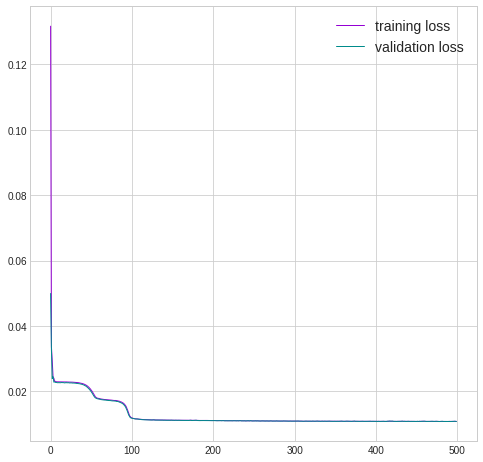

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], color='darkviolet', linewidth=1, label='training loss')
plt.plot(history.history['val_loss'], color='darkcyan', linewidth=1, label='validation loss')
plt.legend(fontsize=14);

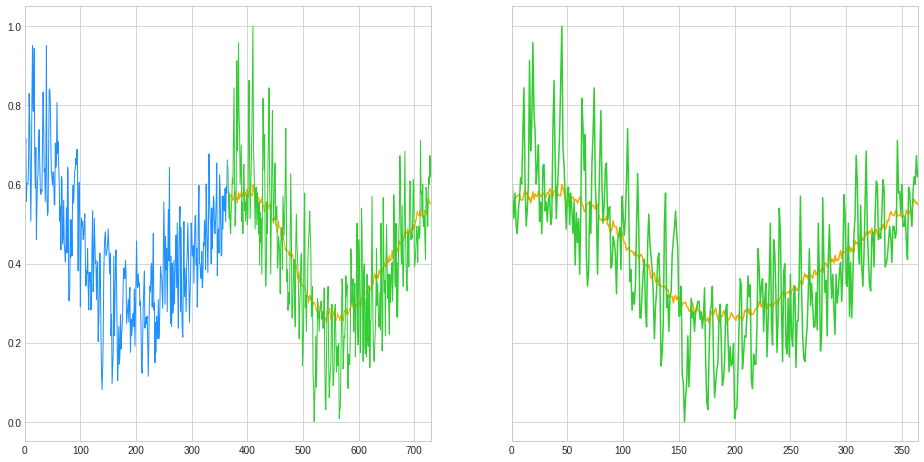

In [14]:
plot_rnn_output(x_test, y_test, 0)

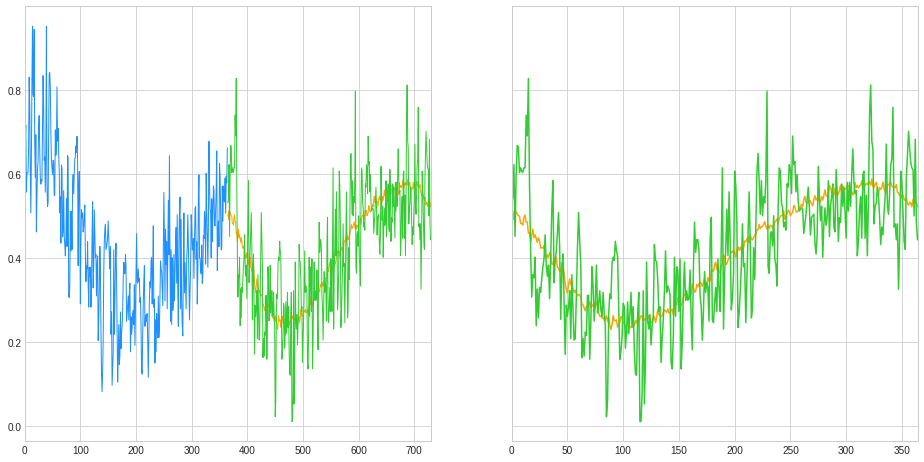

In [15]:
plot_rnn_output(x_test, y_test, 300)

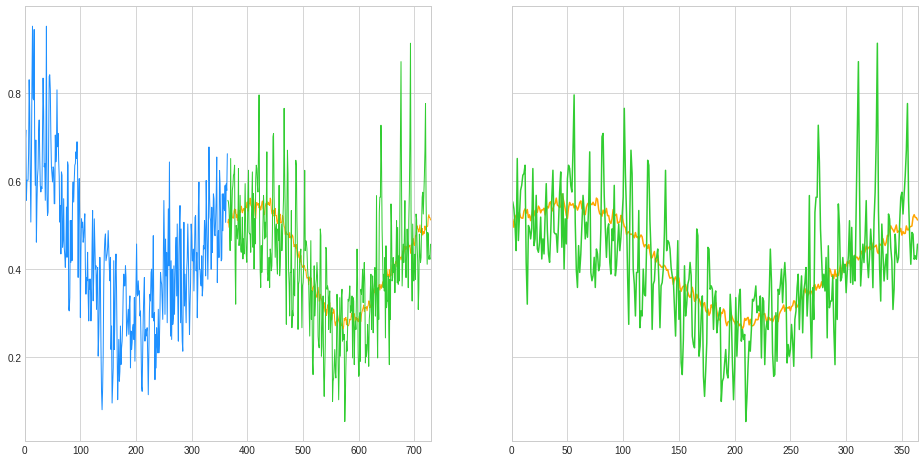

In [16]:
plot_rnn_output(x_test, y_test, 500)

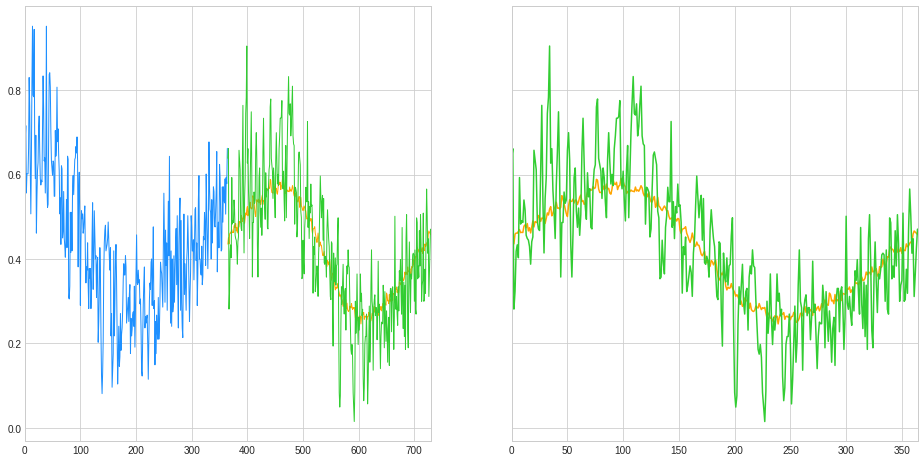

In [17]:
plot_rnn_output(x_test, y_test, 700)